# Support Vector Machines (SVM) Classification

In this exercise, you will work with a synthetic dataset and implement a Support Vector Machines (SVM) classifier using scikit-learn. SVM is a powerful algorithm for binary classification tasks and is widely used in various applications. Your task is to train the SVM model on the given dataset and evaluate its performance using accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Generate a 2D grid of points
n = 60

x = np.linspace(-2*np.pi, 3*np.pi, n)
y = np.linspace(-2*np.pi, 3*np.pi, n)

# TODO: Create a meshgrid of x and y
X, Y = np.meshgrid(x, y)
# It creates a 2D grid (2-dimensional array) of all potential combinations from x and y

# TODO: Calculate the z values as the cos(x) + cos(y) + noise with std=1/5
Z = np.cos(X) + np.cos(Y) + np.random.randn(n, n)/5

X = np.hstack((X.reshape((n**2, 1)), Y.reshape((n**2, 1))))
y = (Z > 0).reshape(n**2, 1)

# TODO: Split the data into training and testing sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

# Why do we need to split our data?

# Reshape the target variables
n_samples = n ** 2
y_train = y_train.reshape((int(n_samples * (1 - test_size)), 1))
y_test = y_test.reshape((int(n_samples * test_size), 1))

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2880, 2)
y_train shape: (2880, 1)

X_test shape: (720, 2)
y_test shape: (720, 1)


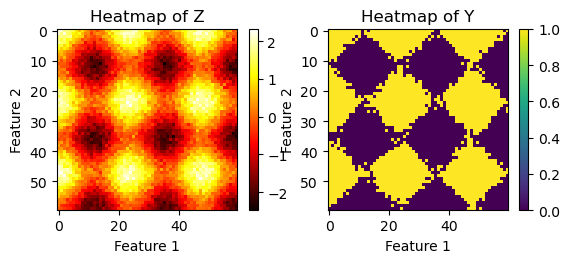

In [3]:
# TODO: Visualize the data
# Create a 1x2 grid for subplots
plt.subplot(1, 2, 1)

# TODO: Display the heatmap for Z using the 'hot' colormap
plt.imshow(Z, cmap='hot')
# Add a colorbar to the first subplot with shrink factor 0.49 to adjust its size
plt.colorbar(shrink=0.49)

# Set the title for the first subplot
plt.title("Heatmap of Z")
# Set the axis title for the first subplot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Set the second subplot
plt.subplot(1, 2, 2)

# TODO: Display the heatmap for Y (reshaped to an n x n matrix) without specifying the colormap (uses default)
plt.imshow(y.reshape((n, n)))
# Add a colorbar to the second subplot with shrink factor 0.49 to adjust its size
plt.colorbar(shrink=0.49)

# Set the title for the second subplot
plt.title("Heatmap of Y")
# Set the axis title for the second subplot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show the plot
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
# TODO: Fit the SVM model first with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# TODO: Predict the train and test datasets
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

# TODO: Assess the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Comment the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

C:\Users\bourakay\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.5395833333333333
Test Accuracy: 0.5736111111111111


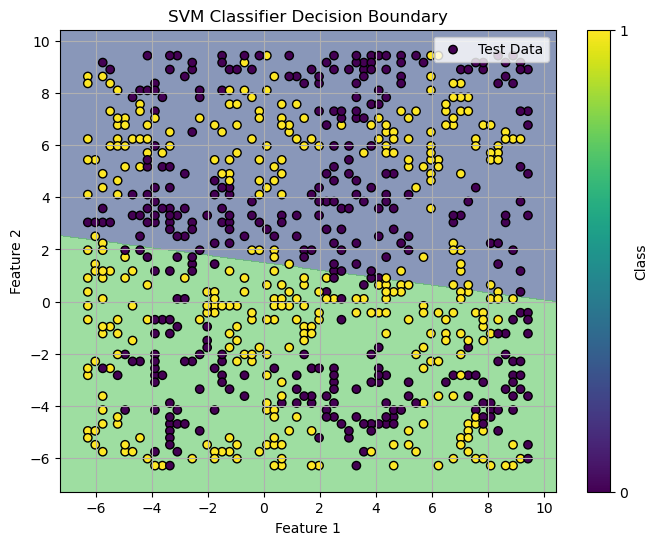

In [6]:
# Visualize the decision boundary and data points
plt.figure(figsize=(8, 6))

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.6)

# TODO: Plot the test data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='black', linewidth=1, marker='o', label='Test Data')

plt.title('SVM Classifier Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Class')
plt.legend()
plt.grid()

plt.show()

In [7]:
# TODO: Fit the SVM model first with a rbf kernel
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)

# TODO: Predict the train and test datasets
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

# TODO: Assess the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Comment the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

C:\Users\bourakay\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.7652777777777777
Test Accuracy: 0.7541666666666667


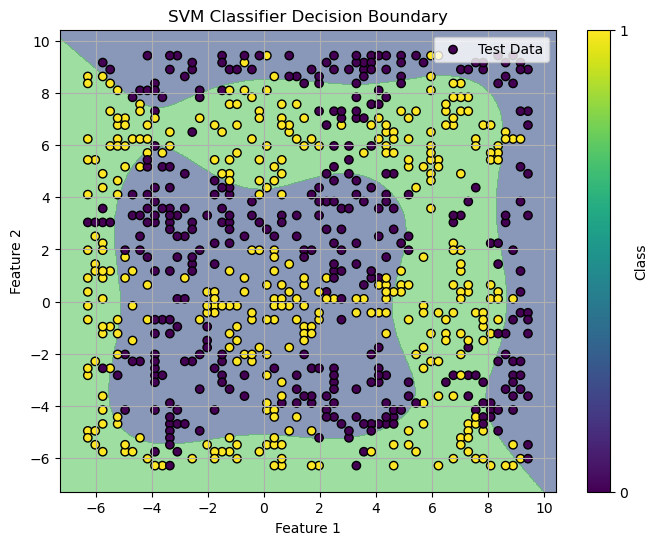

In [8]:
# Visualize the decision boundary and data points
plt.figure(figsize=(8, 6))

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.6)

# TODO: Plot the test data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='black', linewidth=1, marker='o', label='Test Data')

plt.title('SVM Classifier Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Class')
plt.legend()
plt.grid()

plt.show()

# Random Forest (RF) Classification

In this exercise, you will work with a synthetic dataset and implement a Random Forest (RF) classifier using scikit-learn. Random Forest is a powerful algorithm for binary classification tasks and is widely used in various applications. Your task is to train the RF model on the given dataset and evaluate its performance using accuracy.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
# Generate a 2D grid of points
n = 60
x = np.linspace(-2*np.pi, 3*np.pi, n)
y = np.linspace(-2*np.pi, 3*np.pi, n)

# TODO: Create a meshgrid of x and y
X, Y = np.meshgrid(x, y)
# It creates a 2D grid (2-dimensional array) of all potential combinations from x and y

# TODO: Calculate the z values as the cos(x) + cos(y) + noise
Z = np.cos(X) + np.cos(Y) + np.random.randn(n, n)/5

X = np.hstack((X.reshape((n**2, 1)), Y.reshape((n**2, 1))))
y = (Z > 0).reshape(n**2, 1)

# TODO: Split the data into training and testing sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

# Why do we need to split our data?

# Reshape the target variables
n_samples = n ** 2
y_train = y_train.reshape((int(n_samples * (1 - test_size)), 1))
y_test = y_test.reshape((int(n_samples * test_size), 1))

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2880, 2)
y_train shape: (2880, 1)

X_test shape: (720, 2)
y_test shape: (720, 1)


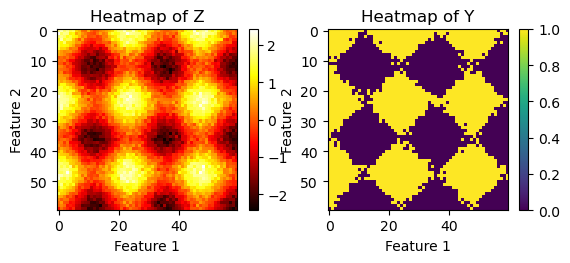

In [11]:
# TODO: Visualize the data
# Create a 1x2 grid for subplots
plt.subplot(1, 2, 1)

# TODO: Display the heatmap for Z using the 'hot' colormap
plt.imshow(Z, cmap='hot')
# Add a colorbar to the first subplot with shrink factor 0.49 to adjust its size
plt.colorbar(shrink=0.49)

# Set the title for the first subplot
plt.title("Heatmap of Z")
# Set the axis title for the first subplot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Set the second subplot
plt.subplot(1, 2, 2)

# TODO: Display the heatmap for Y (reshaped to an n x n matrix) without specifying the colormap
plt.imshow(y.reshape((n, n)))
# Add a colorbar to the second subplot with shrink factor 0.49 to adjust its size
plt.colorbar(shrink=0.49)

# Set the title for the second subplot
plt.title("Heatmap of Y")
# Set the axis title for the second subplot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show the plot
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
# TODO: Fit the Random Forest model on the training dataset
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# TODO: Predict the classes for both the training and testing datasets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# TODO: Assess the accuracy of the model and comment on the results
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

C:\Users\bourakay\AppData\Local\Temp\ipykernel_1896\30677471.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Training Accuracy: 1.0
Test Accuracy: 0.8958333333333334


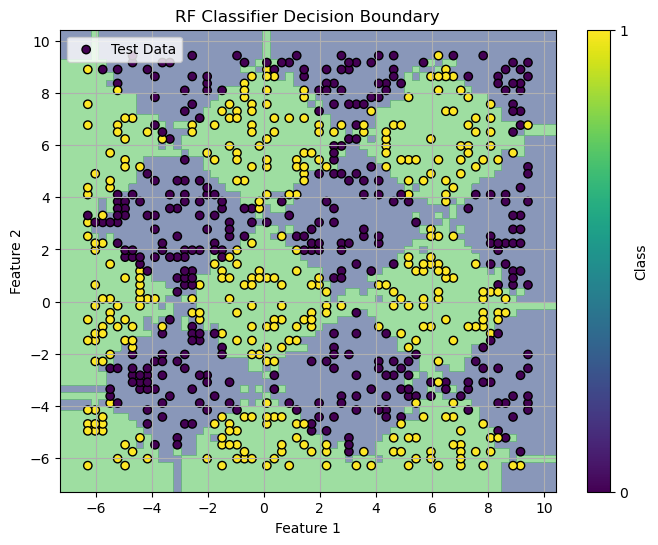

In [14]:
# Visualize the decision boundary and data points
plt.figure(figsize=(8, 6))

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.6)

# TODO: Plot the test data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='black', linewidth=1, marker='o', label='Test Data')

plt.title('RF Classifier Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Class')
plt.legend()
plt.grid()

plt.show()